In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
top = 100
string = 'Returns'

In [80]:
pills = pd.read_csv('../2010_pills.csv')
zipcode = pills.sort_values(by='2010 Pills', ascending=False).head(top)['Zip Code']

In [81]:
df = pd.read_csv('CA-2010-tax.csv')
df = df[['Zip Code', 'Size AGI', string]]
columns = df['Size AGI'].unique()
df = df.set_index(['Zip Code', 'Size AGI'])
index = df.unstack().index
values = df.unstack().values
mydf = pd.DataFrame(values, index=index, columns=columns)

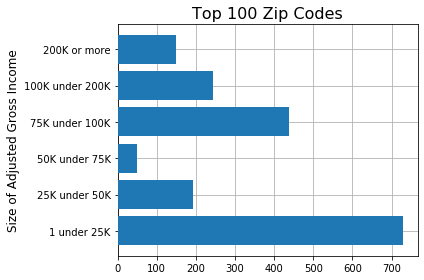

In [82]:
inrng = list(mydf.columns)
values = np.zeros(len(inrng))
for zc in zipcode:
    values += mydf[mydf.index == zc].values.flatten()
plt.barh(inrng, values / 1e3, zorder=3)
plt.title(f'Top {top} Zip Codes', size=16)
#plt.xlabel('2010 Individual Tax Returns (thousand)', size=12)
plt.ylabel('Size of Adjusted Gross Income', size=12)
#plt.xlim(0, 90)
plt.grid()
plt.tight_layout()
plt.savefig(f'top-{top}.png', dpi=150)